In [1]:
# Import necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
# Function to fetch data from the BANCO CENTRAL DO BRASIL API

def fetch_bcb_data(codigo_serie, data_inicio, data_fim):

    # Adjust the date range for daily series to a maximum of 5 years
    data_inicio_dt = datetime.strptime(data_inicio, '%d/%m/%Y')
    data_fim_dt = datetime.strptime(data_fim, '%d/%m/%Y')
    max_range = timedelta(days=365 * 5)

    all_data = []

    while data_inicio_dt <= data_fim_dt:

        # Calculate the end date for the current 5-year window
        current_end = min(data_inicio_dt + max_range, data_fim_dt)

        url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados"

        params = {
            'formato': 'json',
            'dataInicial': data_inicio_dt.strftime('%d/%m/%Y'),
            'dataFinal': current_end.strftime('%d/%m/%Y')
        }

        response = requests.get(url, params=params)

        if response.status_code == 200:
            data = response.json()
            all_data.extend(data)
        else:
            print(f"Erro na requisição: {response.status_code}")
            return None

        data_inicio_dt = current_end + timedelta(days=1)

    # Convert the collected data into a pandas DataFrame
    df = pd.DataFrame(all_data)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = pd.to_numeric(df['valor'], errors='coerce')
    
    return df

In [ ]:
# Index IPCA (code 433) from 1980 to today

df_IPCA = fetch_bcb_data(433, "01/02/1980", datetime.now().date().strftime('%d/%m/%Y'))

display(df_IPCA)

,data,valor
0,1980-02-01,4.62
1,1980-03-01,6.04
2,1980-04-01,5.29
3,1980-05-01,5.70
4,1980-06-01,5.31
...,...,...
546,2024-12-01,0.52
547,2025-01-01,0.16
548,2025-01-01,0.16
549,2025-02-01,1.31


In [ ]:
# SELIC rate (code 432) from 1999 to today

df_SELIC = fetch_bcb_data(432, "05/03/1999", datetime.now().date().strftime('%d/%m/%Y'))

display(df_SELIC)

,data,valor
0,1999-03-05,45.00
1,1999-03-06,45.00
2,1999-03-07,45.00
3,1999-03-08,45.00
4,1999-03-09,45.00
...,...,...
9540,2025-04-17,14.25
9541,2025-04-18,14.25
9542,2025-04-19,14.25
9543,2025-04-20,14.25


In [ ]:
# Fucntion to plot the SELIC and IPCA data

def plot_selic_ipca(start_date = None, end_date = None):

    # Filter the IPCA and SELIC DataFrame for the specified date range
    # Adjust the IPCA rolling sum to include data from 12 months before the start_date
    adjusted_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
    
    if end_date:
        df_IPCA_filtered = df_IPCA[(df_IPCA['data'] >= adjusted_start_date) & (df_IPCA['data'] <= end_date)]
        df_SELIC_filtered = df_SELIC[(df_SELIC['data'] >= start_date) & (df_SELIC['data'] <= end_date)]
    else:
        df_IPCA_filtered = df_IPCA[df_IPCA['data'] >= adjusted_start_date]
        df_SELIC_filtered = df_SELIC[df_SELIC['data'] >= start_date]

    fig, ax1 = plt.subplots(figsize=(20, 5))

    # Plot the rolling sum of IPCA values (12-month window) on the first axis
    ax1.plot(df_IPCA_filtered['data'], df_IPCA_filtered['valor'].rolling(window=12).sum(), color='blue')
    ax1.set_xlabel("Data")  # Set the x-axis label
    ax1.set_ylabel("Índice IPCA (%)", color='blue')

    # Create a second y-axis sharing the same x-axis
    ax2 = ax1.twinx()

    # Plot the SELIC values on the second axis
    ax2.plot(df_SELIC_filtered['data'], df_SELIC_filtered['valor'], color='red')
    ax2.set_xlabel("Data")
    ax2.set_ylabel("Taxa SELIC (%)", color='red')

    plt.grid(True)

    plt.show()

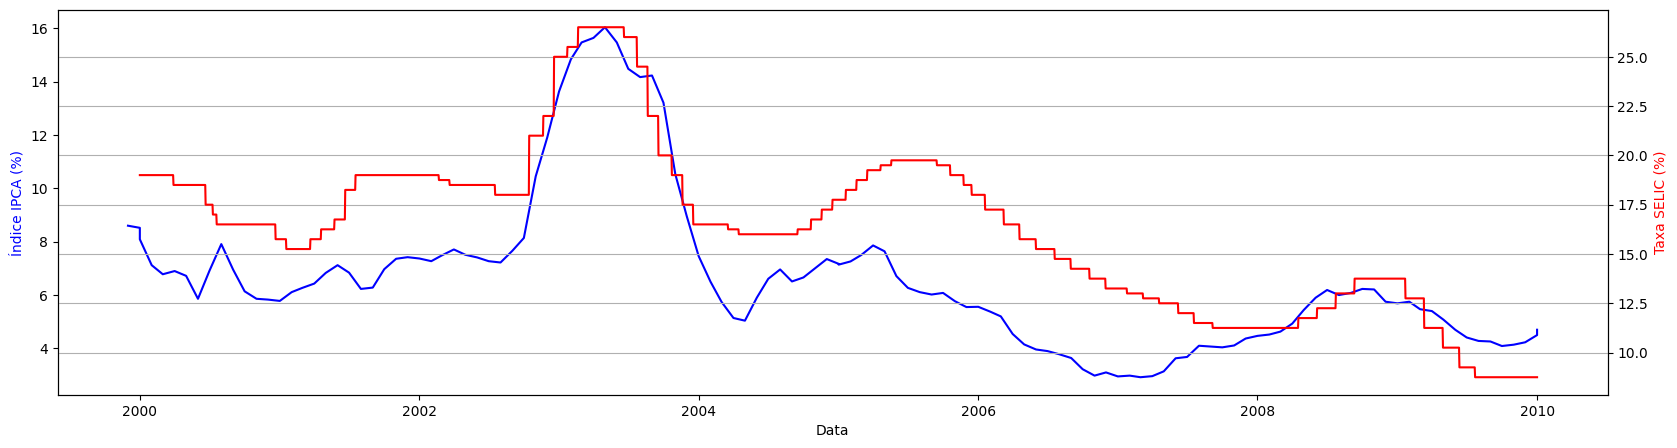

In [17]:
plot_selic_ipca(start_date = '2000-01-01', end_date = '2010-01-01')

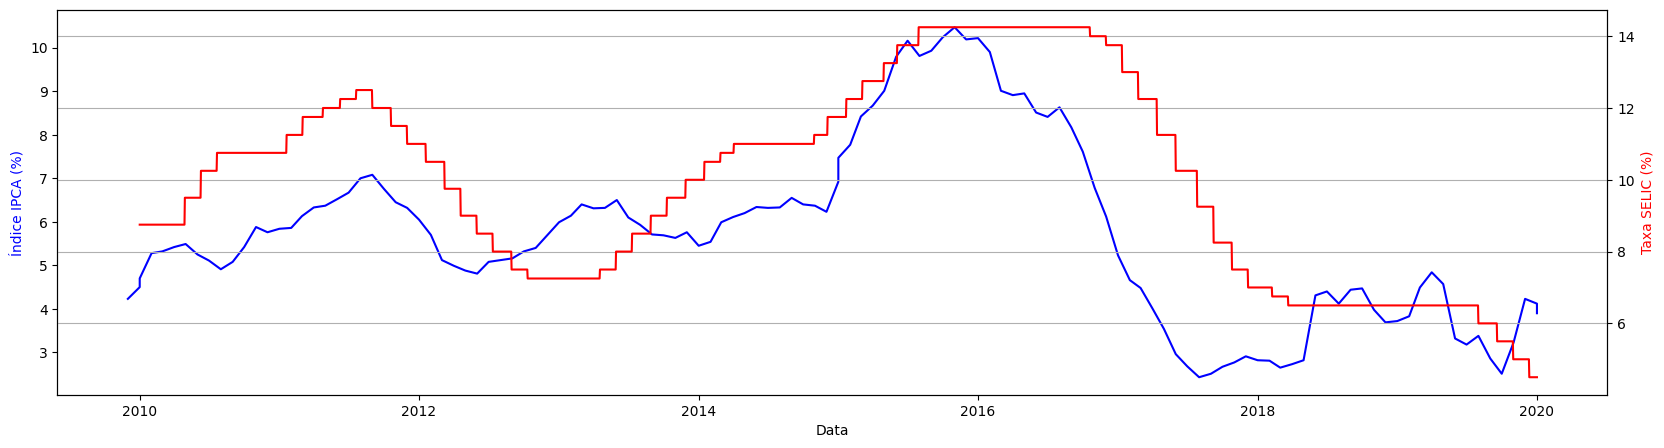

In [18]:
plot_selic_ipca(start_date = '2010-01-01', end_date = '2020-01-01')

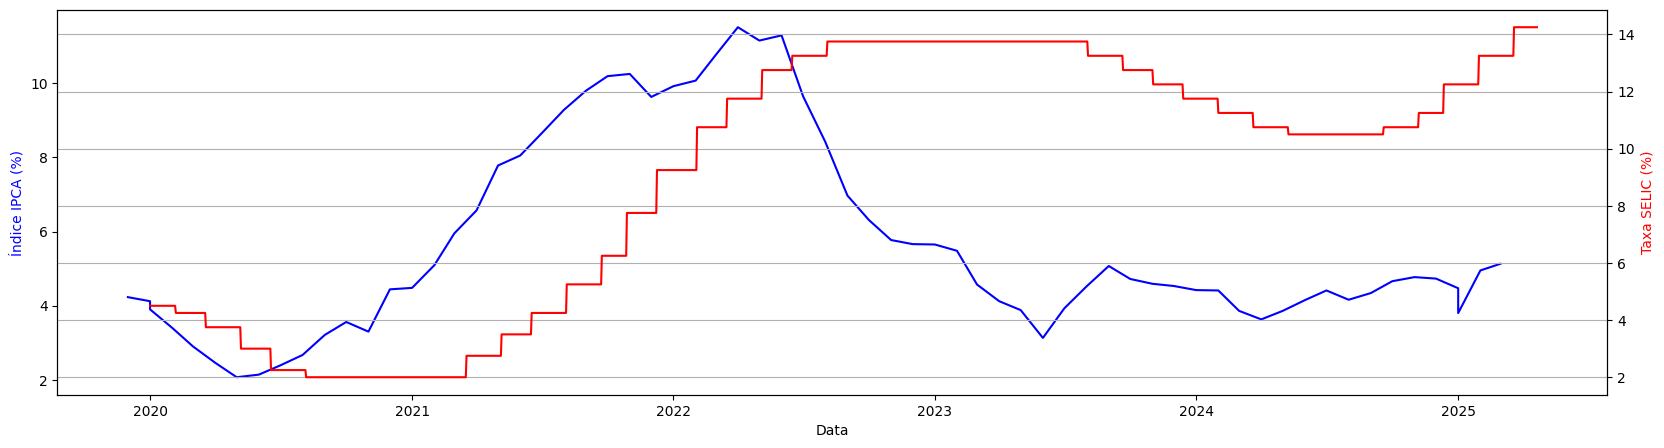

In [19]:
plot_selic_ipca(start_date = '2020-01-01')